David Culhane
<br>
**Merging Data, Storing in Database, and Data Visualizations**
<br>
<br>
For the final step for this project, we will be loading the data from the previouis three scripts into a database as indivdual tables in a database. Once in the database, it can be queried for its contents to create data visualizations. We will be looking to create five visualizations, two of which use data from two of the tables.
<br>
<br>
To create the database, we'll be using SQLite3. The visualizations will be made using matplotlib. First though, the data will need to be loaded.

In [4]:
import pandas as pd

# Loading the data
wb = pd.read_csv('hcpiqr_129.csv')  # Loading the World Bank inflation data
un = pd.read_csv('UN.csv')  # Loading the UN inflation data
news = pd.read_csv('news_data.csv')  # Loading the NewsApi data

Next, the database will need to be created.

In [6]:
import sqlite3

# Creating the database
conn = sqlite3.connect('inflation.db')

In [7]:
# Sending the dataframes to the database as tables
wb.to_sql(name='world bank', con=conn, if_exists='replace', index=False)
un.to_sql(name='united nations', con=conn, if_exists='replace', index=False)
news.to_sql(name='news', con=conn, if_exists='replace', index=False)

# Committing the tables to the database
conn.commit()

**Part 1: Merging the Datasets**
<br>
<br>
With the tables loaded into the database we can merge them together. It's worth noting though that the tables are different sizes. The world bank table has 126 rows, the united nations table has 210 rows, and the news table has only 50 rows. The spirit of this term project was to gather data on inflation from various sources about a slew of countries. Sure, 50 countries could be a slew of countries. It would make the size of the database much smaller than intended though as well as removing countries that were meant to be showcased in the analyis - countries resulting from the break-ups of the Soviet Union and Yugoslavia.
<br>
<br>
To maintain the original spirit of the project, it would be ideal to perform an inner join with the world bank and united nations tables and then a left outer join using the resulting table with the news table. This will create a table that contains the data of countries in the UN and World Bank Tables and tack on the news links and keywords for those countries that were found using NewAPI.

In [9]:
# Making the cursor for the queries
c = conn.cursor()

In [10]:
# Performing joins on the tables to put them together
base_join_query="""CREATE TABLE merged \
    AS \
    SELECT DISTINCT * \
    FROM 'world bank' \
    INNER JOIN 'united nations' ON 'world bank'.Country = 'united nations'.Country \
    LEFT OUTER JOIN news on 'world bank'.Country = news.Country"""

joined = c.execute(base_join_query)

**Part 2: Visualizations with the Data**
<br>
<br>
Now that the dataframes have been converted into tables in the inflation database and merged together, we want to make some graphs using our data. The data will be obtained by querying the joined table.
<br>
<br>
If we want to show a line graph with data using data about the United States, we can query for all of the information from that line of the table and index forthe data we want. Since the UN and WB datasets show different things, margins of change vs total cost in terms of the Consumer Price Index, we will want to store their values in different objects for the purposes of graphing. We will also need a set of x-values representing time, since the values in the database would be for our dependent variable.

In [64]:
import numpy as np

# Creating a list of values for the quarterly WB data
quarterly = np.arange(1970, 2024, 0.25)

# Creating a list of values for the annual UN data
annual = np.arange(2010, 2023)

***Visualization 1: United States***

In [ ]:
# Selecting data for the United States
us_query = c.execute("""SELECT * FROM merged WHERE Country='United States'""")
us_data = us_query.fetchone()


# Indexing for the US quarterly data
us_wb = us_data[2:218]
us_un = us_data[219:232]

(Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'CPI Price'),
 Text(0.5, 1.0, 'Inflation Data for the United States'))

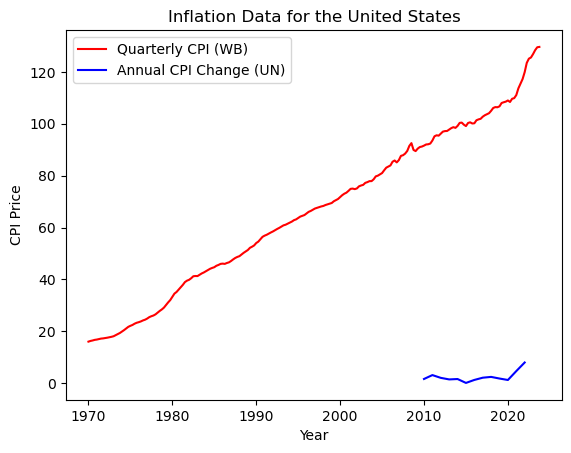

In [104]:
import matplotlib.pyplot as plt

# Plotting two lines using US Data
fig1 = plt.figure()
ax = fig1.add_subplot()
ax.plot(quarterly, us_wb, color='red', label='Quarterly CPI (WB)')
ax.plot(annual, us_un, color='blue', label='Annual CPI Change (UN)')
ax.legend()
plt.xlabel('Year'), plt.ylabel('CPI Price'), plt.title('Inflation Data for the United States')

The United States' graph looks pretty steady, in line with the Federal Reserve's goal of no more than 2-3% inflation per year. Some hitches are visible though around the times of the Great Recession and after COVID.
<br>
<br>
**Visualization 2: Ukraine***
<br>
<br>
Part of the intention of this analysis was to look at a post-Soviet country and check out its data. Ukraine made it into this database, so we can look at it.

In [90]:
# Selecting Data for Ukraine
ukr_query = c.execute("""SELECT * FROM merged WHERE Country='Ukraine'""")
ukr_data = ukr_query.fetchone()

# Indexing for quarterly Ukraine data
ukr_wb = ukr_data[2:218]

# Indexing for annual Ukraine data
ukr_un = ukr_data[219:232]

(Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'CPI Price'),
 Text(0.5, 1.0, 'Inflation Data for Ukraine'))

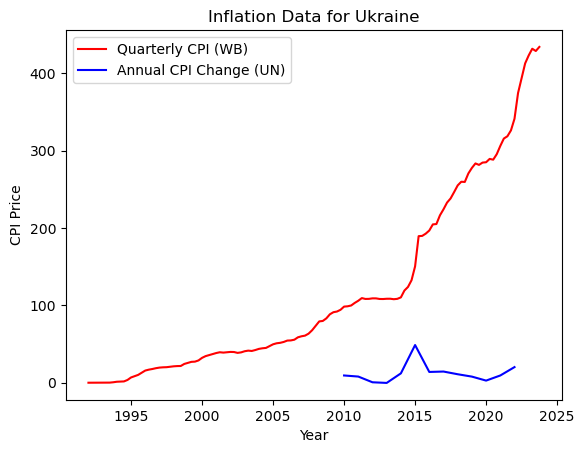

In [106]:
# Plotting two lines using Ukraine Data
fig1 = plt.figure()
ax = fig1.add_subplot()
ax.plot(quarterly, ukr_wb, color='red', label='Quarterly CPI (WB)')
ax.plot(annual, ukr_un, color='blue', label='Annual CPI Change (UN)')
ax.legend()
plt.xlabel('Year'), plt.ylabel('CPI Price'), plt.title('Inflation Data for Ukraine')

Ukraine's graph spans less data due to only coming into existece after the fall of the Soviet Union. They see a spike in inflation starting around 2015 though, likely due to their struggles with Russia dating back to the Yanukoyvich government and the Maidan Revolution.
<br>
<br>
***Visualization 3: Argentina***
<br>
<br>
Argentina is another country that has sometimes been talked about at dfferent points in time with respect to inflation. We can look at its data as well.

In [108]:
# Selecting Data for Argentina
arg_query = c.execute("""SELECT * FROM merged WHERE Country='Argentina'""")
arg_data = arg_query.fetchone()

# Indexing for quarterly Argentina data
arg_wb = arg_data[2:218]

# Indexing for annual Argentina data
arg_un = arg_data[219:232]

(Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'CPI Price'),
 Text(0.5, 1.0, 'Inflation Data for Argentina'))

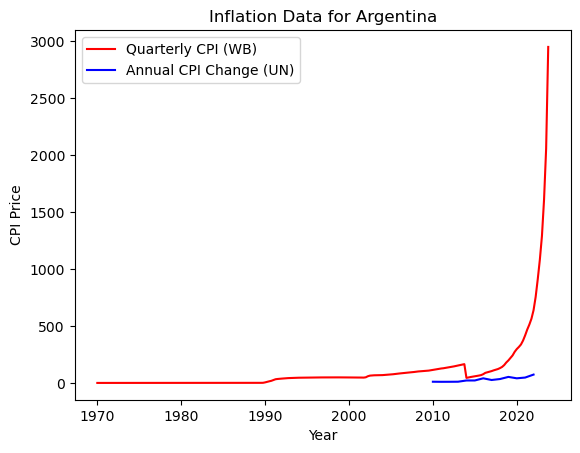

In [110]:
# Plotting two lines using Argentina Data
fig1 = plt.figure()
ax = fig1.add_subplot()
ax.plot(quarterly, arg_wb, color='red', label='Quarterly CPI (WB)')
ax.plot(annual, arg_un, color='blue', label='Annual CPI Change (UN)')
ax.legend()
plt.xlabel('Year'), plt.ylabel('CPI Price'), plt.title('Inflation Data for Argentina')

Argentina's data was at or near 0 for a long period, leading up to 1990 according to our data. It is much more likely that their government did not report data or repsponded to the World Bank refusing to provide official data. A Google search shows that their rates o inflation have tended to be high and that they have been hit the hardest by post-COVID inflation as well.
<br>
<br>
***Visualization 4: Japan***
<br>
<br>
Japan is another country where inflation numbers can be looked at with their previous history. It's also worth noting beforehand that the Yen has historically had a very different conversion rate. For as long as I have been able to remember, a decent unofficial conversion would have $1 valued close to 100 Yen. The conversion rate is slightly higher now, around 150 Yen to the dollar.

In [100]:
# Selecting Data for Japan
jp_query = c.execute("""SELECT * FROM merged WHERE Country='Japan'""")
jp_data = jp_query.fetchone()

# Indexing for quarterly Japan data
jp_wb = jp_data[2:218]

# Indexing for annual Japan data
jp_un = jp_data[219:232]

(Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'CPI Price'),
 Text(0.5, 1.0, 'Inflation Data for Japan'))

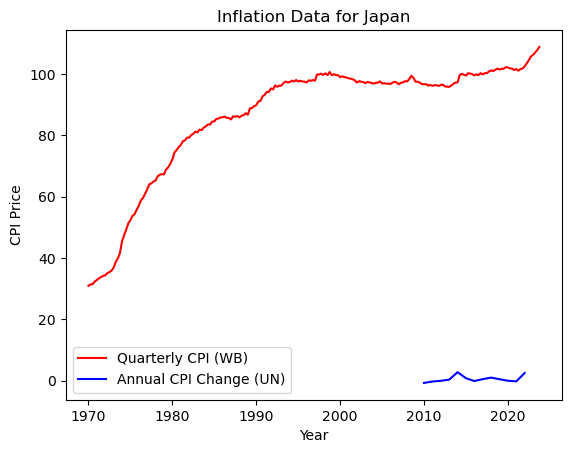

In [112]:
# Plotting two lines using Japan Data
fig1 = plt.figure()
ax = fig1.add_subplot()
ax.plot(quarterly, jp_wb, color='red', label='Quarterly CPI (WB)')
ax.plot(annual, jp_un, color='blue', label='Annual CPI Change (UN)')
ax.legend()
plt.xlabel('Year'), plt.ylabel('CPI Price'), plt.title('Inflation Data for Japan')

Japan's curve looks a bit odd due to some periods where the CPI price actally went down slightly.
<br>
<br>
***Visualization 5: South Africa***
<br>
<br>
We can round off our graphs of inflationary rates around the world by looking at South Africa.

In [116]:
# Selecting Data for South Africa
saf_query = c.execute("""SELECT * FROM merged WHERE Country='South Africa'""")
saf_data = saf_query.fetchone()

# Indexing for quarterly South Africa data
saf_wb = saf_data[2:218]

# Indexing for annual South Africa data
saf_un = saf_data[219:232]

(Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'CPI Price'),
 Text(0.5, 1.0, 'Inflation Data for South Africa'))

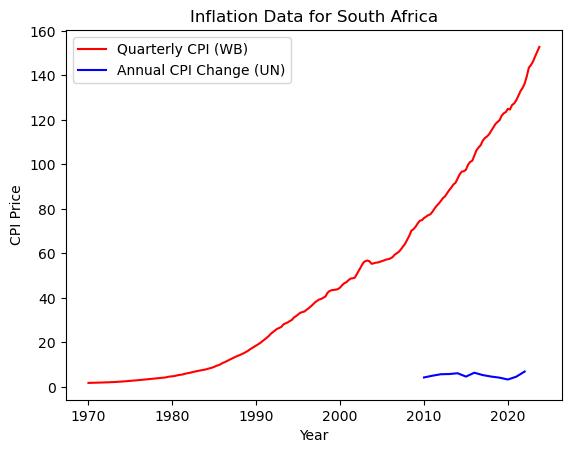

In [118]:
# Plotting two lines using South Africa Data
fig1 = plt.figure()
ax = fig1.add_subplot()
ax.plot(quarterly, saf_wb, color='red', label='Quarterly CPI (WB)')
ax.plot(annual, saf_un, color='blue', label='Annual CPI Change (UN)')
ax.legend()
plt.xlabel('Year'), plt.ylabel('CPI Price'), plt.title('Inflation Data for South Africa')

**Part 3: Conclusion**
<br>
<br>
This project involved a lot of learning and reinforcement throughout the project. Basic skills for working with data in pandas dataframes were further reinforced while other skills like HTML scraping were learned. HTML scraping proved essential to the online and news article scripts since it was the basis of grabbing data from the internet and the scraping of news articles acquired from NewsAPI in their respective scripts.
<br>
<br>
The textual analysis of recent news articles was honestly slightly problematic. I discussed it somewhat at the end of that script but it is worth mentioning again now at the end of the project. The problems are a result of one major factor -  only having a free account with NewsAPI. The free tier only allows for 50 calls to be made every 12 hours, which limited the amount of data that could be pulled in this academic setting where were aren’t storing the data for further analysis.
<br>
<br>
A second limitation of the free tier is that only recent news articles could be called for. This means that the only articles that would appear would be those that were published in the 24 hour period before the call was made. Each call was made using the country’s name and the word “inflation.” That doesn’t mean the top words from the TFIDF vectorization were all inflation related. For example, the top word stems found for Cameroon were 'hiv', 'israel', 'pbf', 'imf', 'food', 'health', 'tech', 'test', 'technolog', and 'fnac'. Israel would not likely be a cause of inflation in Cameroon and “fnac” is not something I would hae expected. Maybe an article had a typo? Either way, the method could have been implemented better if it were able to target articles published in a specific time frame where inflation tracked higher for one reason or another. A deep analysis gathering more than ten articles of text would be more fruitful as well. Either problem could be solved with a paid subscription, but their rates are costly for individuals working in short time periods and scale higher with longer time periods
<br>
<br>.
When it comes to ethics and the data being analyzed in this term project, the most important part would be making sure that the data is accurately represented. The data from the World Bank and United Nations did talk about the same phenomena, the changing of the Consumer price Index, albeit in different terms. Being explicit about these differences is paramount. Otherwise, the different datasets could be used to argue against each other when all that’s happening is a misinterpretation of the dat
<br>
<br>
Bel,ow eth final datset produced by the merged query can be found. It's essentially a header and a footer of the combined tables. Part of the initial nature/intention of thm project meant including NA data, since data regarding a number of countries would have been removed if only countries that had published data every quarter since 1970 were included (like Ukraine, whose data is shown above without issue). So some NA data is presented and should not necessarily be considered a fla..


In [11]:
# Query to show dataset
merged = """SELECT * \
    FROM 'world bank' \
    INNER JOIN 'united nations' ON 'world bank'.Country = 'united nations'.Country \
    LEFT OUTER JOIN news on 'world bank'.Country = news.Country"""

In [12]:
# Showing merged dataset as pandas dataframe
pd.read_sql(merged, con=conn)

,Country,region,1970/3,1970/6,1970/9,1970/12,1971/3,1971/6,1971/9,1971/12,...,2017UN,2018UN,2019UN,2020UN,2021UN,2022UN,Total Change UN,Country,URLs,Top Words
0,Albania,Southern Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.98,2.03,1.41,1.62,2.04,6.73,31.60,None,None,None
1,Algeria,Northern Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.59,4.27,1.95,2.42,7.23,9.27,65.42,None,None,None
2,Angola,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.34,0.38,0.75,-0.47,1.78,3.04,13.50,None,None,None
3,Argentina,Latin America and the Caribbean,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,25.66,34.15,52.80,40.48,47.10,73.13,397.57,Argentina,['https://www.semafor.com/article/07/19/2024/a...,"['soon', 'come', 'mortgag', 'inflat', 'price',..."
4,Aruba,Latin America and the Caribbean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.03,3.63,3.94,-1.31,0.73,5.59,16.17,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,United Kingdom,Northern Europe,8.17,8.37,8.46,8.64,8.88,9.19,9.32,9.44,...,2.68,2.48,1.79,0.85,2.59,9.07,34.78,United Kingdom,['https://www.project-syndicate.org/commentary...,"['gold', 'drink', 'email', 'f1', 'insulin', 'c..."
119,United States,Northern America,16.03,16.30,16.48,16.71,16.83,17.02,17.20,17.28,...,2.13,2.44,1.81,1.25,4.68,7.99,31.63,United States,['https://gizmodo.com/the-1-7-billion-bet-on-a...,"['vanc', 'farmwork', 'food', 'harri', 'border'..."
120,Uruguay,Latin America and the Caribbean,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,6.22,7.61,7.88,9.75,7.75,9.11,106.96,Uruguay,['https://finance.yahoo.com/news/charting-glob...,"['fish', 'patent', 'damodaran', 'aswath', 'mil..."
121,Vanuatu,Melanesia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.07,2.38,2.71,5.35,2.34,4.58,30.99,None,None,None
